LINKS utilizados como apoio
https://www.youtube.com/watch?v=RF3naeREHOk

Modelo de classificação de flores [Tensorflow] - https://www.kaggle.com/shreyanshu/flower-classification-model-tensorflow/notebook

reshape - https://www.acervolima.com.br/2020/04/forma-da-matriz-com-numpy.html



In [1]:
from google.colab import drive
drive.mount('/content/drive')

# conferir que o Google Drive está devidamente montado (deve aparecer a pasta 'drive')
%ls -la

Mounted at /content/drive
total 20
drwxr-xr-x 1 root root 4096 Dec 19 23:15 ./
drwxr-xr-x 1 root root 4096 Dec 19 23:13 ../
drwxr-xr-x 1 root root 4096 Dec 16 17:17 .config/
drwx------ 5 root root 4096 Dec 19 23:15 drive/
drwxr-xr-x 1 root root 4096 Dec  2 22:04 sample_data/


In [2]:
# Entrando no diretório
%cd drive/My Drive//Exercicios_visao_computacional/processamento_imagens

/content/drive/My Drive/Exercicios_visao_computacional/processamento_imagens


In [3]:
# Listando o conteúdo
%ls -la

total 99330
-rw------- 1 root root    33194 Nov 11 18:27 color_img.jpg
-rw------- 1 root root    43539 Nov 28 21:15 edificios.jpg
-rw------- 1 root root    65816 Oct 12 13:12 esquilo-bebe.jpg
drwx------ 2 root root     4096 Nov 11 20:00 flowers/
drwx------ 2 root root     4096 Nov 22 14:54 flowers_output/
-rw------- 1 root root    56289 Nov 23 16:54 Imagem1_cinza.jpg
-rw------- 1 root root     5916 Nov 23 16:54 Imagem1_cortada.jpg
-rw------- 1 root root   675196 Nov 29 21:46 Imagem1_cv2.jpg
-rw------- 1 root root    93503 Sep 29 02:36 Imagem1.jpg
-rw------- 1 root root    56289 Nov 28 20:41 Imagem1_skimage.jpg
-rw------- 1 root root    13967 Sep 29 03:45 Imagem2.jpg
-rw------- 1 root root     3013 Nov 23 16:54 Imagem_ex_1_1.jpg
-rw------- 1 root root    47579 Nov 23 16:54 Imagem_ex_1_2.jpg
-rw------- 1 root root    51973 Nov 23 16:54 Imagem_ex_1_3.jpg
-rw------- 1 root root    15257 Oct  9 18:31 img2-1.jpg
drwx------ 2 root root     4096 Nov 22 14:54 .ipynb_checkpoints/
drwx------ 2 ro

In [4]:
# Import the necessary libraries

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from os.path import join
import cv2
import pandas
import os
import random

from keras.optimizers import Nadam ,SGD, RMSprop, Adam
from keras.models import Sequential

from PIL import Image

In [5]:
# Caminho das pastas com as flores
data = "flowers/"

# Lista dos diretórios dentro da pasta de entrada principal
folders = os.listdir(data)

print(folders)

['rose', 'dandelion', 'daisy', 'tulip', 'sunflower']


# inicio dos testes

In [6]:
# Função para diminuir a altura da imagem
def rezise_altura(img, altura):
    width = int(altura * img.shape[1] / img.shape[0]) #calculando a proporção  
    resized = cv2.resize(img, (width, altura), interpolation = cv2.INTER_AREA) # Interpolando os pixels
    sliced = np.zeros((resized.shape[0], (altura-resized.shape[1])//2+1, 3), dtype = "uint8") # completando a imagem com preto
    resized = np.concatenate((sliced,resized,sliced), axis=1) # para a imagem ficar quadrada, completar com preto
    return resized


# Função para diminuir a largura da imagem
def rezise_largura(img, largura):
    height = int(largura * img.shape[0] / img.shape[1]) #calculando a proporção 
    resized = cv2.resize(img, (largura, height), interpolation = cv2.INTER_AREA)  # Interpolando os pixels
    sliced = np.zeros(((largura-resized.shape[0])//2+1, resized.shape[1], 3), dtype = "uint8") # completando a imagem com preto
    resized = np.concatenate((sliced,resized,sliced), axis=0) # para a imagem ficar quadrada, completar com preto
    return resized


In [7]:
# carregar as imagens fazendo o reshape mantendo a proporção
%%time
image_names = []
train_labels = []
train_images = []

size = 70,70

for folder in folders:
    for file in os.listdir(os.path.join(data,folder)):
        if file.endswith("jpg"):
            image_names.append(os.path.join(data,folder,file))
            train_labels.append(folder)
            img = cv2.imread(os.path.join(data,folder,file))
            #im = cv2.resize(img,size)
            #img_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

            # FAZENDO O RESIZE DAS IMAGENS
            if img.shape[0] < img.shape[1]:
                im = rezise_largura(img, size[0])
            elif img.shape[0] > img.shape[1]:
                im = rezise_altura(img, size[1])
            else:
                im = cv2.resize(img, size, interpolation = cv2.INTER_AREA)
            im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
            im = cv2.cvtColor(im, cv2.COLOR_GRAY2RGB)
            
            train_images.append(img)            
        else:
            continue

CPU times: user 12.3 s, sys: 1.94 s, total: 14.3 s
Wall time: 22min 27s


In [8]:
print ('figura 0', train_images[0].shape, 'figura 1', train_images[1].shape)

figura 0 (212, 320, 3) figura 1 (229, 320, 3)


Text(0.5, 1.0, 'Label:rose')

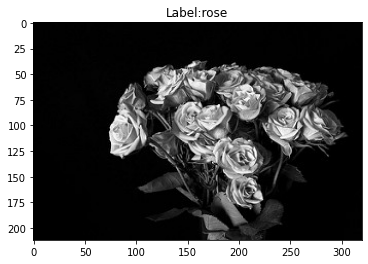

In [9]:
# Visualizando o primeiro exemplo do dataset
plt.imshow(train_images[0], cmap='gray')
plt.title('Label:{}'.format(train_labels[0]))

In [10]:
# Transformando a imagem do tipo array em numpy
import numpy as np
train = np.array(train_images)
print ('Train shape', train.shape)

Train shape (4323,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
# normalizando os valores para RGB

# Convertendo para float32
X_train = train.astype('float32')
# Normalizando os dados
X_train /= 255
print(X_train.shape[0], 'exemplos de treino')

ValueError: ignored

In [ ]:
# Normalizando os dados do label
label_dummies = pandas.get_dummies(train_labels)
labels =  label_dummies.values.argmax(1)
print ('Visualizando o dados do unicos do label')
pandas.unique(train_labels)

Visualizando o dados do unicos do label


array(['rose', 'dandelion', 'daisy', 'tulip', 'sunflower'], dtype=object)

In [ ]:
# Misturando os rótulos e as imagens aleatoriamente para obter melhores resultados
union_list = list(zip(train, labels))
random.shuffle(union_list)
train,labels = zip(*union_list)

# Convertendo a lista dos dados misturados para numpy array
train = np.array(train)
labels = np.array(labels)

In [ ]:
# dividindo os dados em treino e teste
from sklearn.model_selection import train_test_split # Divisão dos dados em treino e teste
RANDOM_STATE = 2020 #semente aleatória
test_size = 0.20

X_train, X_test, y_train, y_test = train_test_split(train, labels, 
                                                    test_size=test_size, 
                                                    random_state=RANDOM_STATE)

print ('Quantidade de registros \n')
print('Dados de treino: X =', X_train.shape,'y=', y_train.shape,'\n','Dados de teste: X= ', X_test.shape,'y=', y_test.shape )

In [ ]:
# Criação dos dados de treinamento e teste, modificando alguns atributos das imagens (a cada nova época)
# Ref: https://keras.io/api/preprocessing/image/
# Ref: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rotation_range=8, 
    width_shift_range=0.08, 
    shear_range=0.3,
    height_shift_range=0.08, 
    zoom_range=0.08)
train_gen.fit(X_train)
train_generator = train_gen.flow(X_train, y_train, batch_size=BATCH_SIZE)
print('Number of examples:',train_generator.n)

NameError: ignored

In [ ]:
# Plotando alguns exemplos gerados
fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(15,15))
for i in range(6):
  x,y = train_generator.next()
  image = x[i]
  label = y[i]
  ax[i].imshow(image.reshape(28,28), cmap='gray')
  ax[i].set_title("L: {}".format(np.argmax(label)))
  ax[i].axis('off')

# fim dos testes

In [ ]:
# O ImageDataGerator de Test não possui nenhum modificador, para manter os dados de teste intactos
test_gen = ImageDataGenerator()
test_generator = test_gen.flow(X_test, y_test, batch_size=BATCH_SIZE)

**fazer um reshape para 3458 x 1024 (32 x 32) = 2.876.416 elementos **

In [ ]:
# convertendo os dados de treino para 1D
X_train = X_train.reshape(3458, -1)
print('X_train', X_train.shape)
print('y_train', y_train.shape)

In [ ]:
t = X_test.reshape(865, -1)
print(t.shape)
print(y_test.shape)

In [ ]:
# Hiper-parâmetros => definição
NB_EPOCH = 150 #200 # tem que passar todos os exemplos na rede
BATCH_SIZE = 128 # a cada passo de treinamento, 128 imagens passam pela rede
VERBOSE = 1 # imprimir o resultado para acompanhar a evolução do treinamento ao final de cada época
NB_CLASSES = 10   # número de classes
VALIDATION_SPLIT = 0.2 #  % do dataset reservado para validação - percentual da base que será usada para testes

In [ ]:
%%time
# Desenvolvendo um modelo sequencial usando tensorflow keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(128,128)),
    keras.layers.Dense(1024, activation=tf.nn.tanh),
    keras.layers.Dense(NB_CLASSES, activation=tf.nn.softmax)
])


model.summary()

In [ ]:
# definindo os parâmetros do modelo
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#Nadam ,SGD, RMSprop, Adam

Vamos adicionar um passo para fazer o Data Augmentation

In [ ]:
# O objetivo das funções de perda é calcular a quantidade que um modelo deve procurar minimizar durante o treinamento.
# 
modelo_v1 = model.fit(X_train, y_train,
                      batch_size = BATCH_SIZE, 
                      epochs = NB_EPOCH,
                      verbose = VERBOSE, 
                      validation_split = VALIDATION_SPLIT)

# Vamos testar com o modelo carregado?
score = model.evaluate(X_test, y_test, verbose = VERBOSE)

# Imprime a perda e a acurácia
print("\nTest loss:", score[0])
print('Test accuracy:', score[1])

In [ ]:
# Fazendo previsões
predictions = model.predict(X_test)

In [ ]:
# Plotando vários exemplos
def displayData(X,Y):
    fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(20,20))
    for i in range(10):
        for j in range(10):
            # Busca um exemplo aleatorio
            ind = np.random.randint(X_test.shape[0])
            ax[i,j].set_title("L: {} P: {}".format(np.argmax(y_test[ind]),np.argmax(predictions[ind])))
            ax[i,j].imshow(X_test[ind,:].reshape(128,128)) 
            #ax[i,j].imshow(X_test[ind,:].reshape(16,16), cmap='gray_r') 
            plt.setp(ax[i,j].get_xticklabels(), visible=False)
            plt.setp(ax[i,j].get_yticklabels(), visible=False)
    
    fig.subplots_adjust(hspace=0.5, wspace=0.5)

displayData(X_test,y_test)

In [ ]:
# Validando o modelo com os dados de teste

In [ ]:
# Vamos agora avaliar o modelo
score = model.evaluate(X_test, y_test, verbose = VERBOSE)

# Imprime a perda e a acurácia
print("\nTest loss:", score[0])
print('Test accuracy:', score[1])

In [ ]:
# Imprimindo a primeira imagem e previsão
plt.imshow(np.reshape(X_test[0], (128,128)), cmap=plt.cm.gray)
plt.title('Label: {} Previsão: {}'.format(np.argmax(y_test[0]) ,np.argmax(predictions[0])), fontsize = 20)